In [1]:
!pip install emoji

In [2]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

In [3]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [4]:
data = []
conversation = 'cse1 chat.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [5]:
data = pd.DataFrame(data, columns=["Date", 'Time', 'User', 'Message'])
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data

,Date,Time,User,Message
0,2019-11-03,9:17 am,None,You were added
1,2019-04-21,12:36 pm,+91 89308 22375,<Media omitted>
2,2019-04-22,9:20 am,Ashish Mdu 1,Are ye pps wali mam ab kyu bula rhi h lab k liye
3,2019-04-22,9:21 am,Ashish Mdu 1,Workshop ki class h koi bta do use
4,2019-04-22,10:06 am,Sajan 2,Pps ka class kb se hai
...,...,...,...,...
582,2021-07-25,7:00 pm,+91 82901 46660,"Roll no. 3, 4,13,15,18 Apna project name send..."
583,2021-07-25,7:00 pm,Vineet MDU,Project name=android app (jind terrace) Studen...
584,2021-07-25,7:01 pm,Nishant,21503 Pet Met
585,2021-07-25,7:01 pm,Vineet MDU,Yeh final h


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     587 non-null    datetime64[ns]
 1   Time     587 non-null    object        
 2   User     557 non-null    object        
 3   Message  587 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 18.5+ KB


In [8]:
data.shape

(587, 4)

In [9]:
data.isnull().sum()

Date        0
Time        0
User       30
Message     0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
## Lets see the unique user in the group

In [12]:
data['User'].unique()

array(['+91 89308 22375', 'Ashish Mdu 1', 'Sajan 2', '+91 88148 78204',
       '+91 73577 08359', '+91 93062 58017', 'Vineet MDU',
       '+91 82901 46660', '+91 70155 18613', '+91 72061 66202', 'Nishant',
       '+91 93067 04595', '+91 86830 01662', 'Laxman Singh',
       'ABHISHEK MDU', '+91 94661 32274', '+91 93540 89750',
       '+91 83689 10388', '+918221010064'], dtype=object)

In [13]:
x='+91 89308 22375','+918221010064','+91 88148 78204','+91 73577 08359','+91 93062 58017','+91 82901 46660', '+91 70155 18613', '+91 72061 66202','+91 93067 04595', '+91 86830 01662', '+91 94661 32274', '+91 93540 89750','+91 83689 10388' 
y='Prerna','kartikay','Abhishek Saini','Umesh Panchal','Mansi Jangra','Ankita','Mohit','Parveen','Partibha','Manoj Dhillon','Aksha Malik','Akash Gujjar','Bulbul Kaushik'
data=data.replace(x,y)

In [14]:
data['User'].unique()

array(['Prerna', 'Ashish Mdu 1', 'Sajan 2', 'Abhishek Saini',
       'Umesh Panchal', 'Mansi Jangra', 'Vineet MDU', 'Ankita', 'Mohit',
       'Parveen', 'Nishant', 'Partibha', 'Manoj Dhillon', 'Laxman Singh',
       'ABHISHEK MDU', 'Aksha Malik', 'Akash Gujjar', 'Bulbul Kaushik',
       'kartikay'], dtype=object)

In [15]:
data['User'].nunique()

19

In [16]:
#### There are 19 unique user in our group

In [17]:
#### Let see the no. of Message in the group
data['Message'].shape

(557,)

In [18]:
#### Total no. of messages are 577 in the group

In [19]:
#### Most Active Users in the group

In [20]:
data['User'].value_counts().head()

Mansi Jangra      81
Abhishek Saini    76
Ashish Mdu 1      73
Prerna            54
Nishant           41
Name: User, dtype: int64

Text(0, 0.5, 'No. Of Messages')

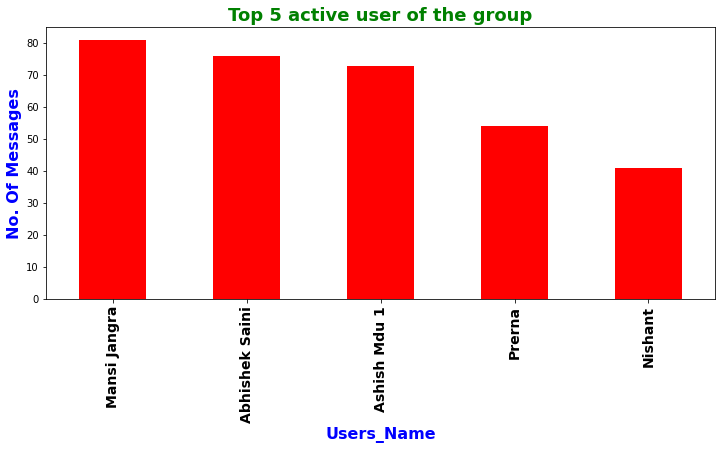

In [21]:
data['User'].value_counts().head().plot(kind='bar',color='red',figsize=(12,5))
plt.title('Top 5 active user of the group',fontsize=18,fontweight='bold',color='green')
plt.xlabel('Users_Name',fontsize=16,fontweight='bold',color='blue')
plt.xticks(fontsize=14,fontweight='bold')
plt.ylabel('No. Of Messages',fontsize=16,fontweight='bold',color='blue')

In [22]:
#### Least Active Users

In [23]:
data['User'].value_counts().tail()

ABHISHEK MDU      8
Bulbul Kaushik    6
Akash Gujjar      4
Parveen           2
kartikay          1
Name: User, dtype: int64

Text(0, 0.5, 'No. Of Messages')

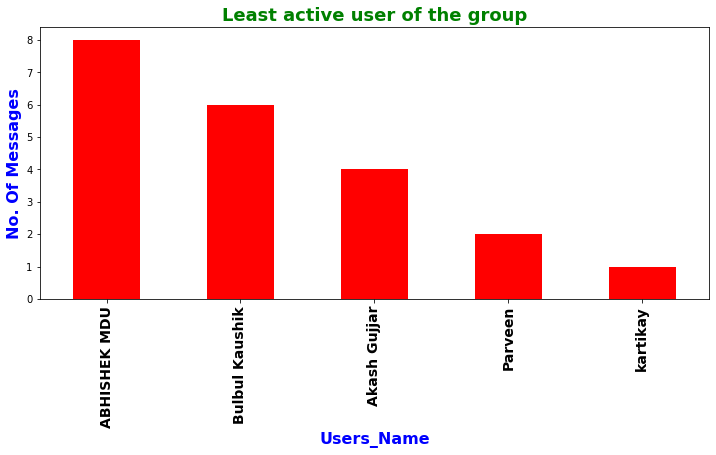

In [24]:
data['User'].value_counts().tail().plot(kind='bar',color='red',figsize=(12,5))
plt.title('Least active user of the group',fontsize=18,fontweight='bold',color='green')
plt.xlabel('Users_Name',fontsize=16,fontweight='bold',color='blue')
plt.xticks(fontsize=14,fontweight='bold')
plt.ylabel('No. Of Messages',fontsize=16,fontweight='bold',color='blue')

In [25]:
#### Lets split the date column

In [26]:
data.head(2)

,Date,Time,User,Message
1,2019-04-21,12:36 pm,Prerna,<Media omitted>
2,2019-04-22,9:20 am,Ashish Mdu 1,Are ye pps wali mam ab kyu bula rhi h lab k liye


In [27]:
data['Year']=data['Date'].dt.year
data['Month_name']=data['Date'].dt.month_name()
data['date']=data['Date'].dt.day
data['day_name']=data['Date'].dt.day_name()

In [28]:
data['Month']=data['Date'].dt.month

In [29]:
data.drop('Date',inplace=True,axis=1)

In [30]:
data.rename(columns={'date':'Date'},inplace=True)

In [31]:
## No. of Media Sent by group
media_file=data[data['Message'] == '<Media omitted>'].shape[0]

In [32]:
media_file

41

In [33]:
## No. of links shared by the group
!pip install urlextract

In [34]:
data=data.reset_index()

In [35]:
## Links Sent in the group

In [36]:
group_url=[]
from urlextract import URLExtract
extractor = URLExtract()
for i in range(1,len(data['Message'])):
    urls = extractor.find_urls(data['Message'][i])
    group_url.extend(urls)

In [37]:
group_url

['b.tech',
 'https://docs.google.com/forms/d/e/1FAIpQLSfQb2IAYDba4JK5x4RNkZIOh2M7tRIDeYynYEiY8cSBTc-qXg/viewform']

In [38]:
## Total No. of Words in the group messages

In [39]:
words=[]
for i in data['Message'].str.split():
    words.append(i)

In [40]:
len(words)

557

In [41]:
#### Most Busy day

In [42]:
data.head()

,index,Time,User,Message,Year,Month_name,Date,day_name,Month
0,1,12:36 pm,Prerna,<Media omitted>,2019,April,21,Sunday,4
1,2,9:20 am,Ashish Mdu 1,Are ye pps wali mam ab kyu bula rhi h lab k liye,2019,April,22,Monday,4
2,3,9:21 am,Ashish Mdu 1,Workshop ki class h koi bta do use,2019,April,22,Monday,4
3,4,10:06 am,Sajan 2,Pps ka class kb se hai,2019,April,22,Monday,4
4,5,10:55 am,Abhishek Saini,<Media omitted>,2019,April,22,Monday,4


In [43]:
busy_day=data.groupby(['User','day_name'])['Message'].count().reset_index()

In [44]:
busy_day['day_name'].value_counts()

Tuesday      18
Friday       17
Thursday     15
Monday       15
Wednesday    14
Saturday     12
Sunday       10
Name: day_name, dtype: int64

Text(0, 0.5, 'No. Of Messages')

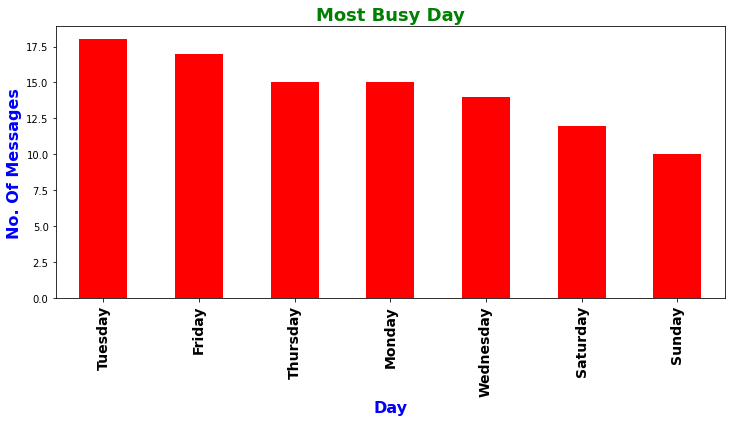

In [45]:
busy_day['day_name'].value_counts().plot(kind='bar',color='red',figsize=(12,5))
plt.title('Most Busy Day',fontsize=18,fontweight='bold',color='green')
plt.xlabel('Day',fontsize=16,fontweight='bold',color='blue')
plt.xticks(fontsize=14,fontweight='bold')
plt.ylabel('No. Of Messages',fontsize=16,fontweight='bold',color='blue')

In [46]:
busy_month=data.groupby(['User','Month_name'])['Message'].count().reset_index()

In [47]:
busy_month

,User,Month_name,Message
0,ABHISHEK MDU,April,3
1,ABHISHEK MDU,July,1
2,ABHISHEK MDU,June,1
3,ABHISHEK MDU,October,2
4,ABHISHEK MDU,September,1
...,...,...,...
111,Vineet MDU,May,1
112,Vineet MDU,November,1
113,Vineet MDU,October,1
114,Vineet MDU,September,4


In [48]:
busy_month['Month_name'].value_counts()

April        16
September    15
July         15
June         15
October      13
August       11
February      9
May           8
November      6
March         6
December      2
Name: Month_name, dtype: int64

Text(0, 0.5, 'No. Of Messages')

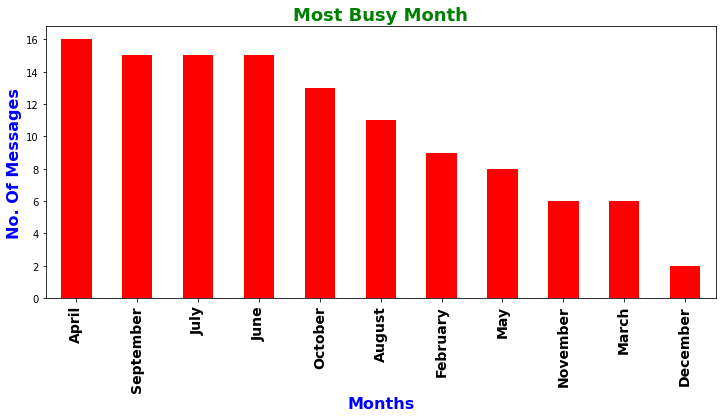

In [49]:
busy_month['Month_name'].value_counts().plot(kind='bar',color='red',figsize=(12,5))
plt.title('Most Busy Month',fontsize=18,fontweight='bold',color='green')
plt.xlabel('Months',fontsize=16,fontweight='bold',color='blue')
plt.xticks(fontsize=14,fontweight='bold')
plt.ylabel('No. Of Messages',fontsize=16,fontweight='bold',color='blue')

In [50]:
busy_year=data.groupby(['User','Year'])['Message'].count().reset_index()

In [51]:
busy_year['Year'].value_counts()

2019    17
2020    16
2021    15
Name: Year, dtype: int64

Text(0, 0.5, 'No. Of Messages')

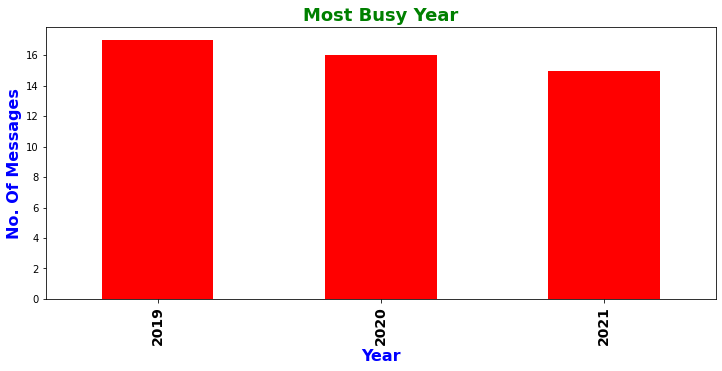

In [52]:
busy_year['Year'].value_counts().plot(kind='bar',color='red',figsize=(12,5))
plt.title('Most Busy Year',fontsize=18,fontweight='bold',color='green')
plt.xlabel('Year',fontsize=16,fontweight='bold',color='blue')
plt.xticks(fontsize=14,fontweight='bold')
plt.ylabel('No. Of Messages',fontsize=16,fontweight='bold',color='blue')

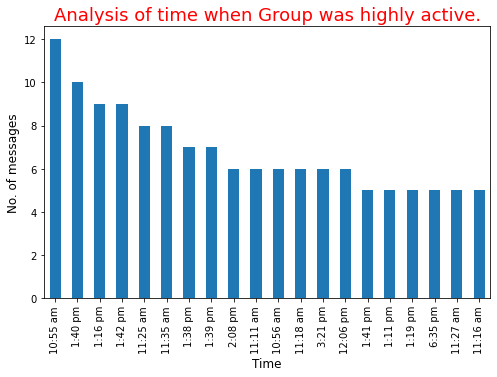

In [53]:
plt.figure(figsize=(8,5))
time= data['Time'].value_counts().head(20)
tx = time.plot.bar()
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 8,'color' :'red'})
plt.show()

In [54]:
## Lets find the monthly timeline
monthly_timeline=data.groupby(['Month','Month_name','Year'])['Message'].count().reset_index()

In [55]:
time = []
for i in range(monthly_timeline.shape[0]):
    time.append(monthly_timeline['Month_name'][i] + "-" + str(monthly_timeline['Year'][i]))


In [56]:
monthly_timeline['Time']=time

In [57]:
monthly_timeline.head()

,Month,Month_name,Year,Message,Time
0,2,February,2019,12,February-2019
1,2,February,2020,20,February-2020
2,2,February,2021,7,February-2021
3,3,March,2019,26,March-2019
4,4,April,2019,120,April-2019


Text(0.5, 1.0, 'Monthly Timeline')

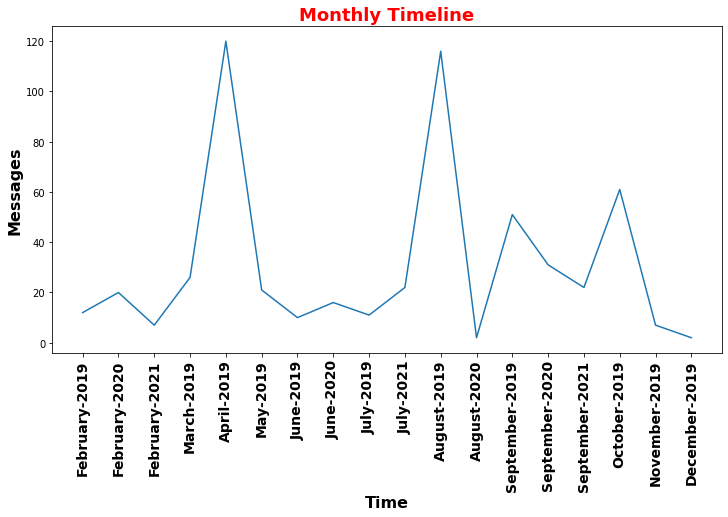

In [58]:
plt.figure(figsize=(12,6))
plt.plot(monthly_timeline['Time'],monthly_timeline['Message'])
plt.xticks(rotation='vertical',fontsize=14,fontweight='bold')
plt.xlabel('Time',fontsize=16,fontweight='bold')
plt.ylabel('Messages',fontsize=16,fontweight='bold')
plt.title('Monthly Timeline',fontsize=18,fontweight='bold',color='red')

In [59]:
## Lets find the daily_timeline 


In [60]:
## Lets find the monthly timeline
daily_timeline=data.groupby(['Date','Year'])['Message'].count().reset_index()

In [61]:
daily_timeline

,Date,Year,Message
0,2,2020,18
1,2,2021,22
2,5,2019,6
3,6,2019,1
4,7,2019,25
5,9,2019,79
6,10,2019,11
7,11,2019,20
8,13,2019,16
9,13,2020,9


In [62]:
daily_time = []
for i in range(daily_timeline.shape[0]):
    daily_time.append(str(daily_timeline['Date'][i]) + "-" +str(daily_timeline['Year'][i]))


In [63]:
daily_timeline['Time']=daily_time

In [64]:
daily_timeline.head()

,Date,Year,Message,Time
0,2,2020,18,2-2020
1,2,2021,22,2-2021
2,5,2019,6,5-2019
3,6,2019,1,6-2019
4,7,2019,25,7-2019


Text(0.5, 1.0, 'Daily Timeline')

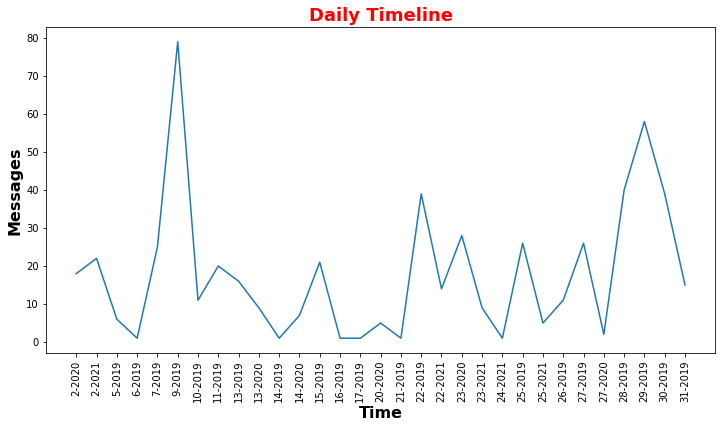

In [65]:
plt.figure(figsize=(12,6))
plt.plot(daily_timeline['Time'],daily_timeline['Message'])
plt.xticks(rotation='vertical')
plt.xlabel('Time',fontsize=16,fontweight='bold')
plt.ylabel('Messages',fontsize=16,fontweight='bold')
plt.title('Daily Timeline',fontsize=18,fontweight='bold',color='red')

In [66]:
## Analysis of emojis
emojis = []
for message in data['Message']:
    emojis.extend([emojis for emojis in message if emojis in emoji.UNICODE_EMOJI['en']])

In [67]:
emojis

['🙄',
 '🙄',
 '🤦',
 '♀',
 '🤦',
 '♀',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤣',
 '🤣',
 '😂',
 '😂',
 '👍',
 '😜',
 '😜',
 '😜',
 '😜',
 '😜',
 '😜',
 '😜',
 '😜',
 '😜',
 '😜',
 '😜',
 '👍',
 '😒',
 '😂',
 '😂',
 '🤣',
 '😂',
 '🤣',
 '😂',
 '😂',
 '😂',
 '🤣',
 '😂',
 '😂',
 '😂',
 '🤣',
 '🤣',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤣',
 '😂',
 '😂',
 '🤣',
 '😤',
 '😤',
 '😂',
 '🤣',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😂',
 '😂',
 '😂',
 '🙄',
 '🙄',
 '🙄',
 '🙄',
 '😊',
 '🙄',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤪',
 '🤔',
 '🤔',
 '😂',
 '😂',
 '😂',
 '🤤',
 '🤘',
 '😂',
 '😂',
 '😂',
 '🤭',
 '🤭',
 '🤭',
 '🤨',
 '🤨',
 '🤨',
 '😀',
 '😀',
 '🤬',
 '🤬',
 '🤬',
 '👍',
 '👍',
 '🤟',
 '🏻',
 '😒',
 '🤣',
 '🤣',
 '🤣',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤟',
 '🏻',
 '🤩',
 '🤟',
 '🏻',
 '😑',
 '😒',
 '🤩',
 '🥳',
 '😒',
 '😑',
 '😅',
 '🙄',
 '😑',
 '😅',
 '😬',
 '😅',
 '👍',
 '👍',
 '👍',
 '👍',
 '👍',
 '👍',
 '😂',
 '😇',
 '😇',
 '😂',
 '😂',
 '🥴',
 '🤣',
 '😂',
 '😂',
 '😲',
 '😲',
 '😅',
 '😎',
 '😎',
 '👍',
 '🤗',
 '😂',
 '💙',
 '☠',
 '😂']

In [68]:
## Lets Count the emojis
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [69]:
emoji_df.head()

,0,1
0,😂,52
1,🤣,14
2,👍,11
3,😜,11
4,🙄,8


In [70]:
emoji_df[1]

0     52
1     14
2     11
3     11
4      8
5      6
6      4
7      4
8      3
9      3
10     3
11     3
12     3
13     3
14     2
15     2
16     2
17     2
18     2
19     2
20     2
21     2
22     2
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
Name: 1, dtype: int64

Text(0.5, 1.0, 'Emojis Analysis')

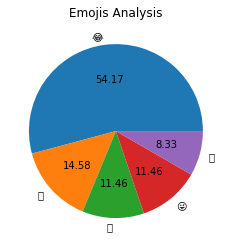

In [71]:
plt.pie(emoji_df[1].head(),labels=emoji_df[0].head(),autopct="%0.2f")
plt.title('Emojis Analysis')

In [72]:
## Most repeating number of words in the messages
text=data[data['Message'] != '<Media omitted>']

In [73]:
for i in text['Message']:
    print(i)

Are ye pps wali mam ab kyu bula rhi h lab k liye
Workshop ki class h koi bta do use
Pps ka class kb se hai
Lb lg ri h kya Pps ki???🙄
Haa ja jldi
Workshop ki class lgri hai filhal
Okh
Koi notice regarding lab🙄
Bhai tu soja acha rhega
🤦‍♀🤦‍♀
😂😂😂😂
🤣🤣😂😂
Kl lgalenge lab grp 2 ke saath
Nhi yrr
Aaj lagenge
Aaj hi lgate h
Haa
👍
😜😜😜😜😜😜  *नेता* - हाँ. अब सही समय आ गया है. *जनता* - क्या आप देश को लूट खाओगे ? *नेता* - बिल्कुल नही. *जनता* - हमारे लिए काम करोगे ? *नेता* - हाँ.  बहुत. *जनता*  -  महगांई बढ़ाओगे ? *नेता*  -  इसके बारे में तो सोचो भी मत *जनता*  - आप हमे जॉब दिलाने में मदद  करोगे ? *नेता* -  हाँ. बिल्कुल करेँगे. *जनता*  -  क्या आप देश मे घोटाला करोगे ? *नेता* - पागल हो गए हो क्या बिलकुल नहीं. *जनता* - क्या हम आप पर भरोसा कर सकते हैं ? *नेता*   - हाँ *जनता*  - नेता जी ...  *चुनाव जीतकर नेताजी वापस आये*  *अब आप, नीचे से ऊपर पढ़ो.* 😜😜😜😜😜 @Desi_Hindi_Jokes
Kal pps ki lab sab grp ki 11 to 1 bje
Pps ki class ki timing Kiya h ajjj
Waiting for this message
Nhi
Yrr
Kuch nhi hai aaj
Waiting for this

In [74]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text['Message'].str.cat(sep=" "))

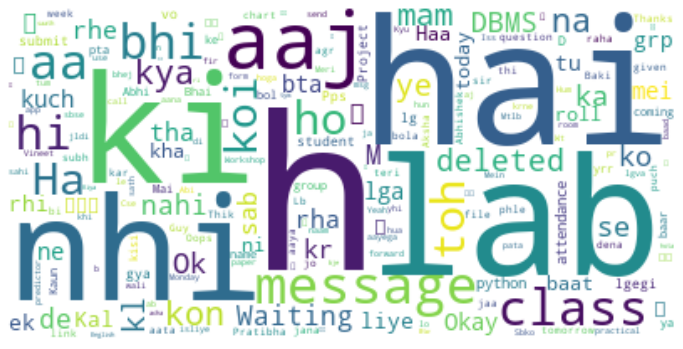

In [75]:
plt.figure(figsize=(12,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

In [76]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

In [77]:
data.head()

,index,Time,User,Message,Year,Month_name,Date,day_name,Month,positive,negative,neutral
0,1,12:36 pm,Prerna,<Media omitted>,2019,April,21,Sunday,4,0.0,0.0,1.0
1,2,9:20 am,Ashish Mdu 1,Are ye pps wali mam ab kyu bula rhi h lab k liye,2019,April,22,Monday,4,0.0,0.0,1.0
2,3,9:21 am,Ashish Mdu 1,Workshop ki class h koi bta do use,2019,April,22,Monday,4,0.0,0.0,1.0
3,4,10:06 am,Sajan 2,Pps ka class kb se hai,2019,April,22,Monday,4,0.0,0.0,1.0
4,5,10:55 am,Abhishek Saini,<Media omitted>,2019,April,22,Monday,4,0.0,0.0,1.0


In [79]:
x=sum(data["positive"])
y=sum(data["negative"])
z=sum(data["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutral")

score(x,y,z)

Neutral


In [92]:
data['Sentiment']=data['positive']+data['negative']+data['neutral']

In [100]:
data_Sentiment = data[['User','positive','negative','neutral']]

In [101]:
data_Sentiment

,User,positive,negative,neutral
0,Prerna,0.0,0.000,1.000
1,Ashish Mdu 1,0.0,0.000,1.000
2,Ashish Mdu 1,0.0,0.000,1.000
3,Sajan 2,0.0,0.000,1.000
4,Abhishek Saini,0.0,0.000,1.000
...,...,...,...,...
552,Ankita,0.0,0.196,0.804
553,Vineet MDU,0.0,0.000,1.000
554,Nishant,0.0,0.000,1.000
555,Vineet MDU,0.0,0.000,1.000
